In [21]:
# Mutation rates (from real data) and parameters
# Note that we need two sets of parameters: one used for simulation, 
#the other used by TADA for scoring genes (those with the suffix "est")
source("TADA/TADA.R")
data <- read.csv("TADA/data/ASC_2231trios_1333trans_1601cases_5397controls.csv", header=TRUE, as.is=TRUE)
mu <- data$mut.rate
mu.frac <- c(0.074, 0.32)
pi <- 0.06
gamma.mean <- c(18, 5.4)
beta <- c(1, 0.5)
gamma.mean.est <- c(18, 5.4)
beta.est <- c(1, 0.5)

# Use simulation to assess the power of TADA.denovo
nr <- 10
rs <- numeric(nr)
N <- 550 #5050

rrListLoF <- c(4, seq(5, 50, by = 5))
rrListMis3 <- rrListLoF/4

power.mean <- numeric(length(N))
power.sd <- numeric(length(N))




    nr <- 10
rsOut <- matrix(0, nrow = nr, ncol = length(rrListLoF))
rsOutList <- list()

Ntime <- 10
for (ii in 1:length(rrListLoF)){

    gamma.mean <- c(rrListLoF[ii], rrListMis3[ii])
    gamma.mean.est <- c(rrListLoF[ii], rrListMis3[ii])
    
    
  rs <- replicate(nr, eval.TADA.denovo(N, mu, mu.frac, pi, 
                                       gamma.mean, beta, gamma.mean.est, beta.est, FDR=0.1))
  
    rsOut[, ii] <- rs
#    power.mean[ii] <- mean(rs)
#  power.sd[i] <- sd(rs)

#power.dn <- data.frame(mean=power.mean, sd=power.sd)
   
    }
#    rsOutList[[kk]] <- rsOut
 #   }
    

In [26]:
rrListLoF
rrListMis3

[1]  4  5 10 15 20 25 30 35 40 45 50

[1]  1.00  1.25  2.50  3.75  5.00  6.25  7.50  8.75 10.00 11.25 12.50

In [22]:
power.mean
rsOut

[1] 0

1,1,1,2,4,10,7,15,25,40,49
1,1,1,1,3,6,13,23,30,25,41
1,1,1,2,8,5,13,20,26,37,29
1,1,1,2,1,12,11,18,28,43,44
1,1,1,3,4,9,14,18,22,36,39
1,1,1,2,6,11,14,14,36,32,45
1,1,1,3,5,8,13,11,25,31,52
1,1,1,3,8,7,17,19,28,49,44
1,1,1,3,6,1,17,10,26,31,46
1,1,1,1,4,1,12,19,26,36,53


In [23]:
rs

[1] 49 41 29 44 39 45 52 44 46 53

In [24]:
gamma.mean
gamma.mean.est

[1] 50.0 12.5

[1] 50.0 12.5

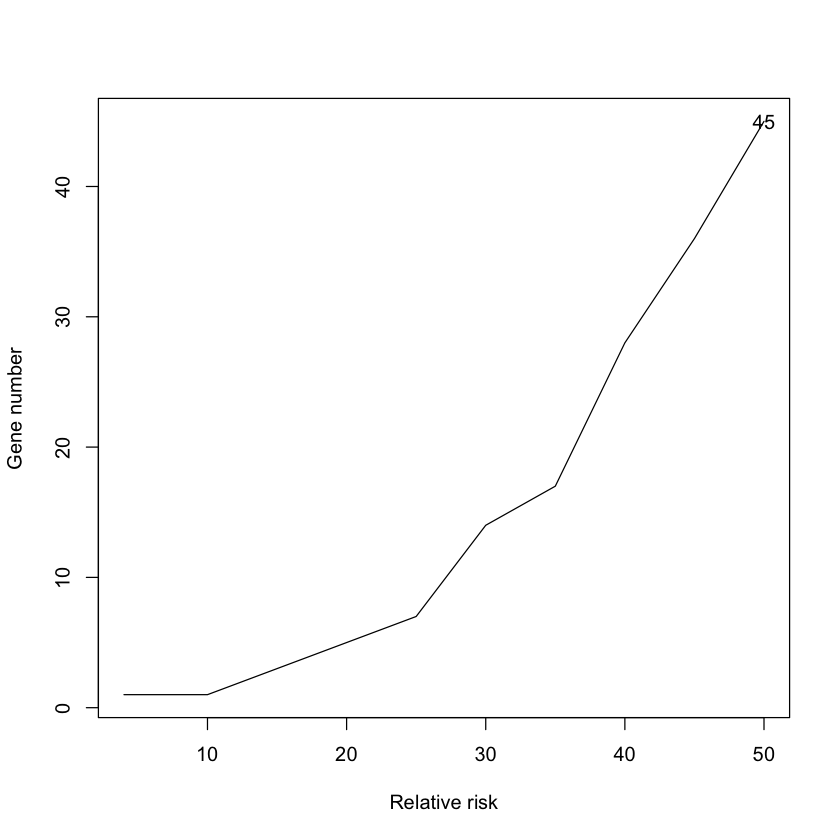

In [25]:
geneCount <- apply(rsOut, 2, function(y) ceiling(mean(y)))

plot(rrListLoF, geneCount, xlab = 'Relative risk', ylab = 'Gene number', col = 'white')
lines(rrListLoF, geneCount)
text(rrListLoF[length(rrListLoF)], geneCount[length(geneCount)], geneCount[length(geneCount)])